<a href="https://colab.research.google.com/github/farahenany/Dissertation/blob/main/Factor_Analysis_for_Hong_Kong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
% pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 187 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=72371cb4dc6a5212f22508e6dbb5b8c2f85de8ba3334c2b5f54d634aefca2cbc
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
# set option to display all columns in data frame
pd.options.display.max_columns = None

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
customer_base = pd.read_csv("drive/MyDrive/Dissertation/Dissertation/customer_retail_bank/ordinaldata.csv")
customer_base.head()

,Market_AUH,Market_CAN,Market_HK,Market_MX,Market_MYH,Market_SGH,Market_UAE,Market_UK,Market_US,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.30413,-0.399255,-0.390173,-0.173116,-0.198310,-0.270957,-0.235752,-0.184097,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.30413,-0.399255,-0.390173,-0.173116,-0.198310,-0.270957,-0.235752,-0.184097,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.31483,-0.403697,-0.394302,-0.187796,-0.211193,-0.270957,-0.235752,-0.248222,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.31483,-0.403697,-0.394302,-0.187796,-0.211193,-0.270957,-0.235752,-0.248222,-0.321304,-0.196207,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.30413,-0.399255,-0.390173,-0.173116,-0.198310,-0.270957,-0.235752,-0.184097,-0.321304,-0.182459,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0


In [ ]:
customer_base = customer_base[customer_base.Market_HK != 0]

In [ ]:
customer_base.head()

,Market_AUH,Market_CAN,Market_HK,Market_MX,Market_MYH,Market_SGH,Market_UAE,Market_UK,Market_US,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS
110592,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498388,0.340562,0.194867,0.927912,0.767868,-0.270957,-0.235752,4.625303,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0
110593,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498388,0.340562,0.194867,0.927912,0.767868,-0.270957,-0.235752,4.625303,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
110594,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327184,0.188156,0.073730,0.693026,0.561750,-0.270957,-0.235752,3.599297,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0
110595,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498388,0.340562,0.194867,0.927912,0.767868,-0.270957,-0.235752,4.625303,-0.321304,0.848619,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0
110596,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.498388,0.340562,0.194867,0.927912,0.767868,-0.270957,-0.235752,4.625303,-0.321304,0.848619,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0


In [ ]:
customer_base= customer_base.drop(['Market_AUH','Market_CAN','Market_HK','Market_MX','Market_MYH', 'Market_SGH','Market_UAE','Market_US','Market_UK'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
customer_base

,Numcust,TRB,Revenue,Primary_cust,Digital_cust,CA_holders,Card_holders,Ins_holders,Inv_holders,Mort_holders,Primary,International,CA,Card,Insurance,Investment,Mortgage,Digital,Proposition,Tenure,Age,NPS
110592,0.498388,0.340562,0.194867,0.927912,0.767868,-0.270957,-0.235752,4.625303,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0
110593,0.498388,0.340562,0.194867,0.927912,0.767868,-0.270957,-0.235752,4.625303,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
110594,0.327184,0.188156,0.073730,0.693026,0.561750,-0.270957,-0.235752,3.599297,-0.321304,-0.251197,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0
110595,0.498388,0.340562,0.194867,0.927912,0.767868,-0.270957,-0.235752,4.625303,-0.321304,0.848619,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3.0
110596,0.498388,0.340562,0.194867,0.927912,0.767868,-0.270957,-0.235752,4.625303,-0.321304,0.848619,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165883,-0.272029,-0.020710,0.147514,-0.246518,-0.262722,-0.186125,-0.144362,-0.504723,-0.105930,-0.251197,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,2.0
165884,-0.250629,0.079479,0.287097,-0.246518,-0.262722,-0.164916,-0.121515,-0.504723,-0.052086,-0.251197,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,1.0,1.0
165885,-0.250629,0.079479,0.287097,-0.246518,-0.262722,-0.164916,-0.121515,-0.504723,-0.052086,-0.113720,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,3.0
165886,-0.250629,0.079479,0.287097,-0.246518,-0.262722,-0.164916,-0.121515,-0.504723,-0.052086,-0.113720,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,3.0,3.0,1.0,2.0


In [ ]:
customer_base.dtypes

Numcust          float64
TRB              float64
Revenue          float64
Primary_cust     float64
Digital_cust     float64
CA_holders       float64
Card_holders     float64
Ins_holders      float64
Inv_holders      float64
Mort_holders     float64
Primary          float64
International    float64
CA               float64
Card             float64
Insurance        float64
Investment       float64
Mortgage         float64
Digital          float64
Proposition      float64
Tenure           float64
Age              float64
NPS              float64
dtype: object

In [ ]:
customer_base=customer_base.drop(['CA','Card', 'Insurance','Investment', "Mortgage","Primary",'CA_holders', 'Digital'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
#Performing a factoribility test (Bartlett)

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(customer_base)
chi_square_value, p_value

(674050.8167550856, 0.0)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(customer_base)

In [ ]:
kmo_model

0.8225115246921073

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()

fa.fit(customer_base)
eigen_values, vectors = fa.get_eigenvalues()

In [ ]:
eigen_values

array([5.1018311 , 1.83791152, 1.31093917, 1.00000166, 1.00000067,
       1.00000001, 0.83095185, 0.63870423, 0.5432209 , 0.42980071,
       0.21803788, 0.05024303, 0.02715592, 0.01120135])

In [ ]:
vectors

array([ 4.98219973e+00,  1.57011147e+00,  9.08091784e-01,  1.90571341e-01,
        1.35375821e-01,  9.40928906e-02,  7.95279714e-02,  6.96378900e-02,
        1.48553276e-02,  9.26124065e-07, -6.64797180e-06, -2.27734364e-05,
       -5.54395042e-02, -3.13993230e-01])

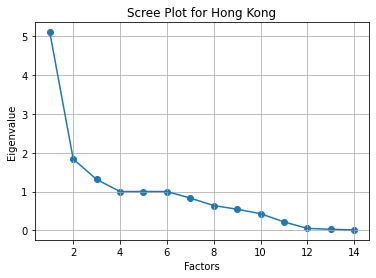

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,customer_base.shape[1]+1),eigen_values)
plt.plot(range(1,customer_base.shape[1]+1),eigen_values)
plt.title('Scree Plot for Hong Kong')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(customer_base)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [ ]:
factor_df=pd.DataFrame(fa.loadings_,index=customer_base.columns)
print(factor_df)

                      0         1         2         3
Numcust        0.996980  0.026285 -0.020376  0.062396
TRB            0.733974  0.563744 -0.095652  0.359988
Revenue        0.512418  0.742678 -0.084075  0.344250
Primary_cust   0.676623  0.017581 -0.013440  0.042720
Digital_cust   0.962383  0.042748 -0.002436  0.129436
Card_holders   0.983787  0.006328  0.005435 -0.043742
Ins_holders   -0.002533  0.088046 -0.119465  0.522561
Inv_holders    0.013105  0.029790 -0.272389  0.512730
Mort_holders   0.676446  0.017685 -0.014145  0.043251
International -0.043195 -0.027111  0.992683 -0.083568
Proposition   -0.144141  0.785628  0.011611 -0.039785
Tenure         0.000185  0.000253 -0.000056 -0.001029
Age           -0.000490 -0.000263 -0.000161 -0.001219
NPS           -0.000318 -0.000202 -0.000126 -0.001162


In [ ]:
fa.get_factor_variance()

(array([4.62749693, 1.49914513, 1.09107071, 0.81888736]),
 array([0.3305355 , 0.10708179, 0.07793362, 0.05849195]),
 array([0.3305355 , 0.43761729, 0.51555091, 0.57404287]))